                                                 Project- 2


Name:C.Anilkumar Reddy

Campus_Id:HS44379

For the project 2 I am using the Air Quality Data Set dataset which can be found the following link:

"https://archive.ics.uci.edu/ml/datasets/Air+Quality "

File name: air.xlsx

Size:0.05 megabytes

Data Set details:9358 rows and 15 columns

Abstract of the dataset: Contains the responses of a gas multisensor device deployed on the field in an Italian city.

Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

The device was located on the field in a significantly polluted area, at road level,within an Italian city.

Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. 

Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities.

Attribute Information:

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity



Hypothesis

1.There is a linear realtion between relative humidity and temerature and it's concentration.

2. There is a linear realtion between absolute humidity humidity and temerature and it's concentration.


In [148]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as plot



In [152]:
# Here we are parsing date and time for easy analysis
Data=pd.read_excel('air.xlsx',parse_dates={'datetime': ['Date', 'Time']})

In [133]:
Data.head()

datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10 18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10 19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10 20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10 21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10 22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [115]:
# Last 5 rows of the data set 
Data.tail()

datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
9352 2005-04-04 10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04 11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04 12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04 13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04 14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T      RH        AH  
9352      1728.50  21.850  29.250  0.756824  
9353      1269.00  24.325  23.725  0.711864  
9354      1092.00  26.900  18.350  0.640649  
9355       769.75  28.325  13.550  0.513866  
9356       816.00  28.500  13.125  0.502804

In [116]:
# There are totally 15 columns and 9357 rows 
# Date is datetime data type 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.5 KB


                                     EDA- Exploratarty data analysis

In [34]:
# There are no null values in our data set 
for i in Data.columns:
    a=(Data[i].isnull().sum())
    print("The number of null values in " + i  +    " column is:'"+ str(a))

The number of null values in Date column is:'0
The number of null values in Time column is:'0
The number of null values in CO(GT) column is:'0
The number of null values in PT08.S1(CO) column is:'0
The number of null values in NMHC(GT) column is:'0
The number of null values in C6H6(GT) column is:'0
The number of null values in PT08.S2(NMHC) column is:'0
The number of null values in NOx(GT) column is:'0
The number of null values in PT08.S3(NOx) column is:'0
The number of null values in NO2(GT) column is:'0
The number of null values in PT08.S4(NO2) column is:'0
The number of null values in PT08.S5(O3) column is:'0
The number of null values in T column is:'0
The number of null values in RH column is:'0
The number of null values in AH column is:'0


In [36]:
# This is the stats info of the dataset 
Data.describe()



CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.776600    39.483611    -6.837604  
std      43.203438    51.215645    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.950000    34.050000     0.692275  
50%      17.200000    48.550000     0.976823  
75%      24.075000    61.875000     1.296223  
max      44.600000    88.725000     2.231036

In [37]:
# In the dataset we have -200 values  of 8,443 values so this column can be removed which needs to be removed
Data['NMHC(GT)'].value_counts()

-200    8443
 66       14
 40        9
 29        9
 88        8
        ... 
 422       1
 424       1
 339       1
 445       1
 307       1
Name: NMHC(GT), Length: 430, dtype: int64

In [38]:
# For other columns the -200 value count is not that affecting 
for i in Data.columns:
    print(Data[i].value_counts())

2004-09-21    24
2004-11-09    24
2004-12-01    24
2004-11-30    24
2004-11-29    24
              ..
2004-07-13    24
2004-07-12    24
2005-04-02    24
2005-04-04    15
2004-03-10     6
Name: Date, Length: 391, dtype: int64
18:00:00    390
05:00:00    390
14:00:00    390
13:00:00    390
12:00:00    390
11:00:00    390
10:00:00    390
09:00:00    390
08:00:00    390
07:00:00    390
19:00:00    390
06:00:00    390
04:00:00    390
03:00:00    390
02:00:00    390
01:00:00    390
00:00:00    390
23:00:00    390
22:00:00    390
21:00:00    390
20:00:00    390
15:00:00    389
16:00:00    389
17:00:00    389
Name: Time, dtype: int64
-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.9         1
 7.6         1
 9.3         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 97, dtype: int64
-200.000000     366
 1099.500000     12
 954.250000      12
 986.750000      12
 888.000000      11
               ... 
 808.000000       1
 834.333333       1
 8

In [39]:
# Dropping the NMHC(GT) column 
Data.drop('NMHC(GT)', inplace=True, axis=1)

In [42]:
Data.shape

(9357, 14)

In [72]:
# In our data set we also have-200 value count other values which needs to be replaced it with mean 
# We also need to replace -200 with nan values
Data.replace(to_replace= -200, value= np.NaN, inplace= True)


cleaned_data= Data.columns[2:13]

for i in  cleaned_data:
    
    Data[i] = Data[i].fillna(Data[i].mean())

    

In [75]:
# we have sucessfully replaced the values with the mean 
Data['CO(GT)'].value_counts()

2.15275    1683
1.00000     305
1.40000     279
1.60000     275
1.50000     273
           ... 
9.90000       1
7.60000       1
9.30000       1
7.00000       1
8.50000       1
Name: CO(GT), Length: 97, dtype: int64

In [76]:
# Data stats after replacing them
Data.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.152750  1099.707856    10.082993     939.029205   246.881252   
std       1.316068   212.796116     7.302474     261.557856   193.419417   
min       0.100000   647.250000     0.149048     383.250000     2.000000   
25%       1.200000   941.250000     4.591495     742.500000   112.000000   
50%       2.152750  1074.500000     8.593367     923.250000   229.000000   
75%       2.600000  1221.250000    13.636091    1104.750000   284.200000   
max      11.900000  2039.750000    63.741476    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     835.370973   113.075515   1456.143486  1022.780725    18.316054   
std      251.741784    43.911095    339.365351   390.609000     8.658396   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      665.500000    85.900000   1241.500000   741.750000    12.025000   
50%      817.500000   113.075515   1456.143486   982.500000    18.275000   
75%      960.250000   133.000000   1662.000000  1255.250000    24.075000   
max     2682.750000   339.700000   2775.000000  2522.750000    44.600000   

                RH           AH  
count  9357.000000  8991.000000  
mean     49.232360     1.025530  
std      16.974308     0.403813  
min       9.175000     0.184679  
25%      36.550000     0.736769  
50%      49.232360     0.995395  
75%      61.875000     1.313701  
max      88.725000     2.231036

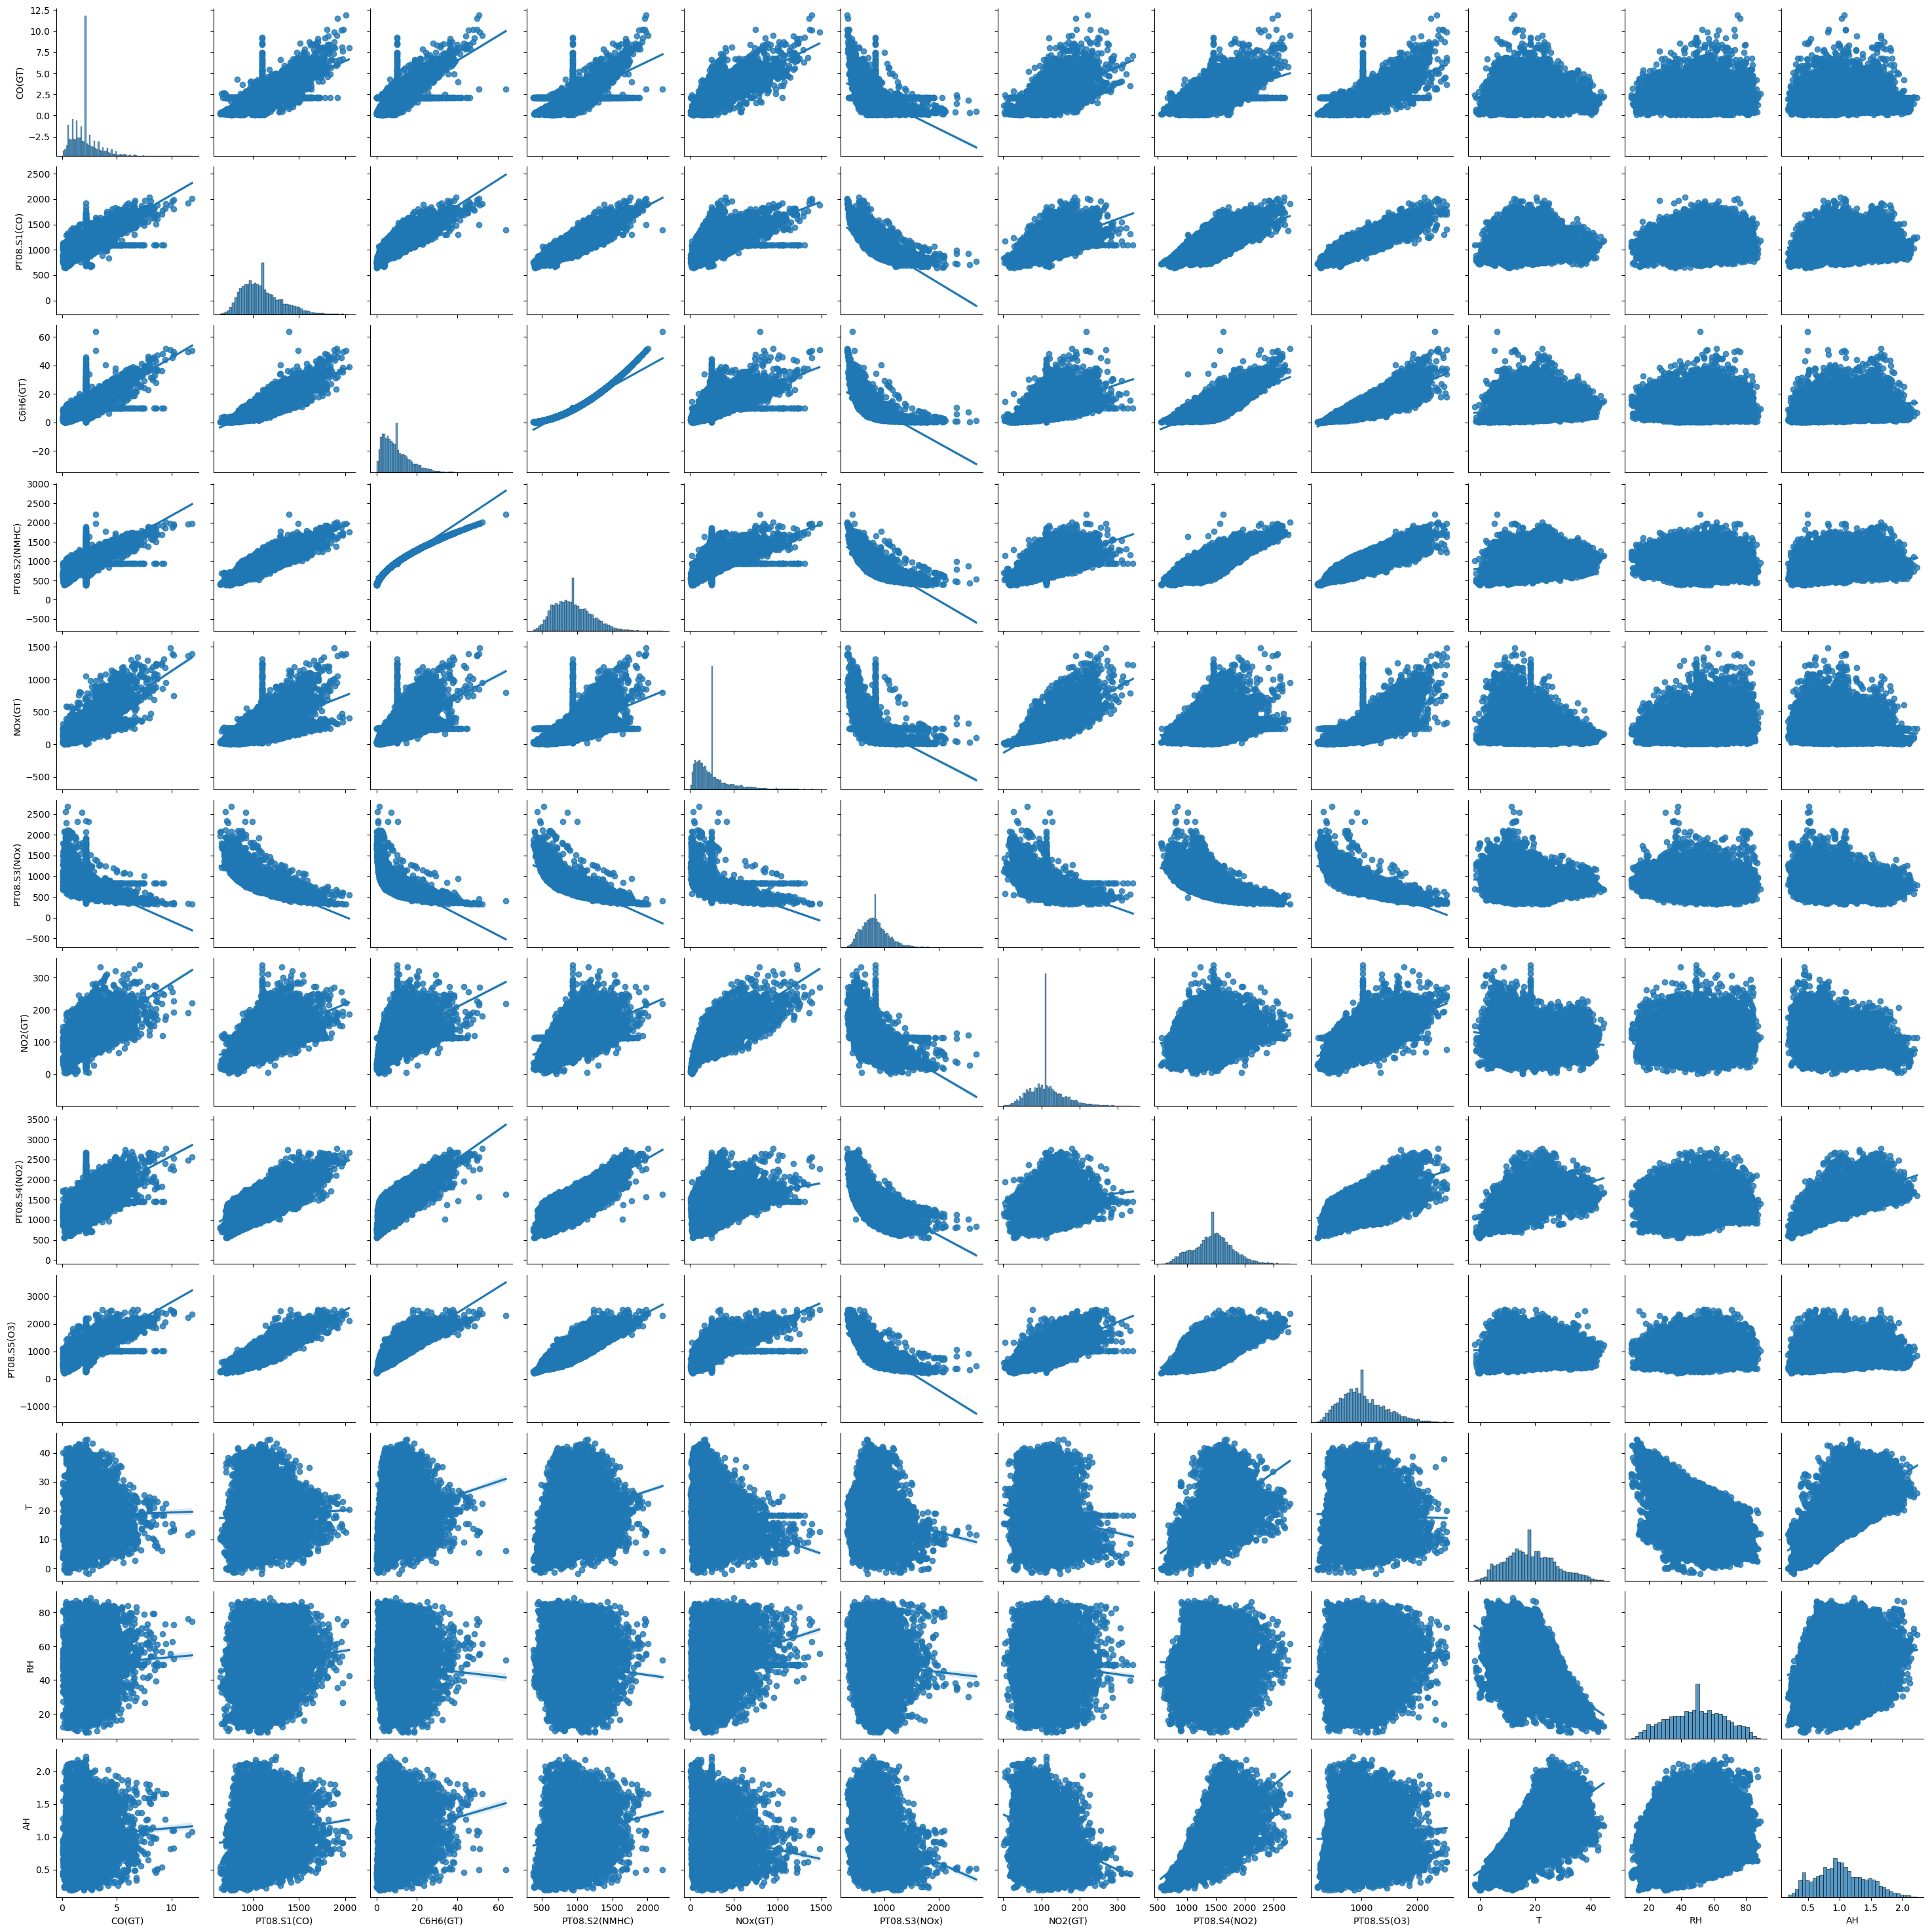

In [95]:
# The below pair plot shows the individual relationship between each and every column  
sns.pairplot(Data, kind="reg")
plt.show()


Now i want to find out each indivudal concentration of gases which is used the most 

The highest amount of gases used is PT08.S4(NO2)

The least amount of gas used is C6H6GT 

C:\Users\Anil\AppData\Local\Temp\ipykernel_5228\3193960163.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  plot = Data.mean().plot.pie(y='', figsize=(10,7),subplots=True,autopct = "%.2f%%",colors=colors )
C:\Users\Anil\AppData\Local\Temp\ipykernel_5228\3193960163.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plot = Data.mean().plot.pie(y='', figsize=(10,7),subplots=True,autopct = "%.2f%%",colors=colors )


array([<AxesSubplot:ylabel='None'>], dtype=object)

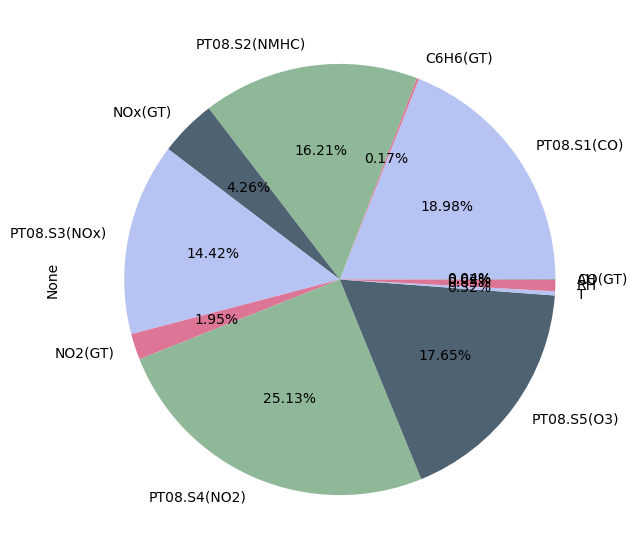

In [104]:

colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plot = Data.mean().plot.pie(y='', figsize=(10,7),subplots=True,autopct = "%.2f%%",colors=colors)
plot

#Few gasses are highly correlated.

#This heat map shows that NMHC(GT) has correlation coefficient of 0.98 with  PT08.S2 (titania).

#Concentration of carbon oxide(gt) has correlation coefficient of 0.9 with PT08.S2(NMHC) Non Methane HydroCarbons

<AxesSubplot:>

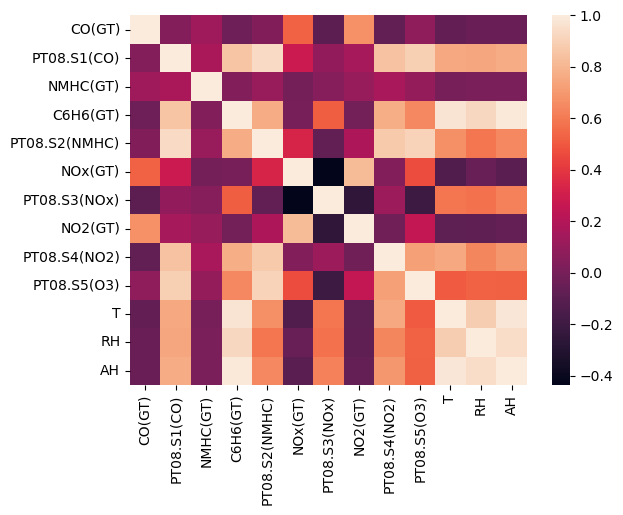

In [124]:
 
sns.heatmap(data=Data.corr())

Hypothesis


1.There is a linear realtion between relative humidity and temerature and it's concentration.


This scatterplot is showing that more the temperature, lesser the relative humidity.

It means relative humidity is indirectly proportional to the temperature.

Our initial hypothesis is wrong as tempereature increases relative humidty decreases 


In [140]:

figure1 = plot.scatter(Data,x="RH",y="T",color ='RH',title = "Concentrations over Temperature and Relative Humidity")
figure1.show()

Hypothesis

2. There is a linear realtion between absolute humidity humidity and temerature and it's concentration.


Absolute humidity is driectly proptional to tempeature

SO there is linear relationship b/w  absolute humidty and temperature 

our initial hypothesis is true

In [143]:

figure2= plot.scatter(Data,x="AH",y="T",color ='AH',title = "Concentrations over Temperature and Absolute Humidity")
figure2.show()

This displays a bivariate density curve on the main plot, showing the relation between relative humidity  dependent variable here) and temperature.

Graphs on the margin show the distribution of temperature and the third plot placed on the right margin shows distribution of humidity.

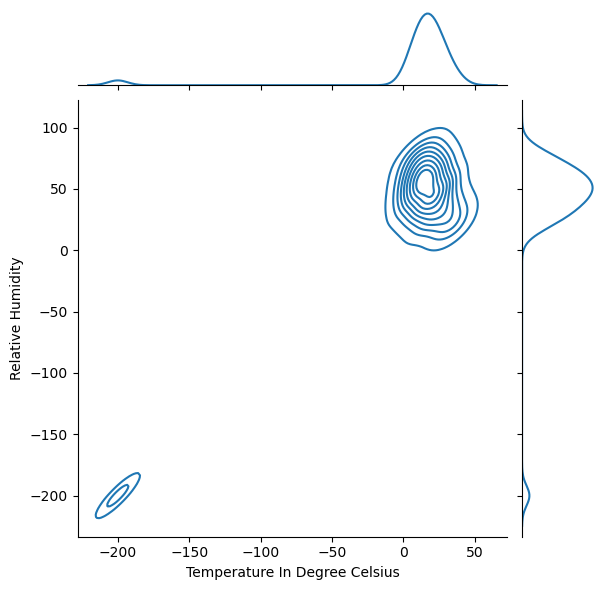

In [144]:
sns.jointplot(x="T", y="RH", data=Data,kind= "kde").set_axis_labels("Temperature In Degree Celsius", "Relative Humidity")



In [145]:
# From This we can observe That more temparture in the year 2004 than 2005 
fig =plot.scatter(Data,x="datetime",y="T",color ="T")
fig.show()

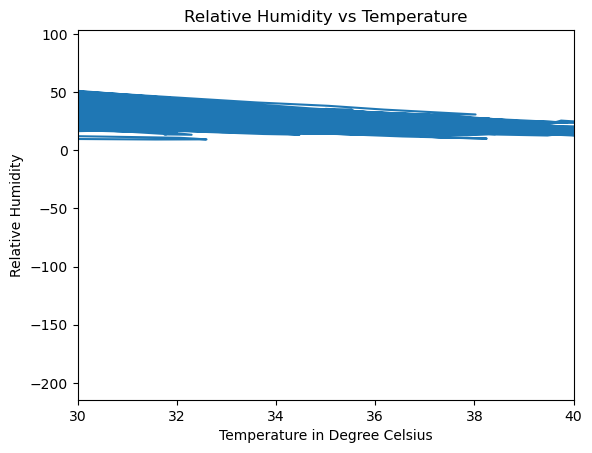

In [151]:
#relative humidity is indirectly proportional to the temperature.
plt.xlabel("Temperature in Degree Celsius")
plt.ylabel('Relative Humidity')
plt.xlim(30,40)
plt.title("Relative Humidity vs Temperature")
plt.plot(Data['T'],Data["RH"])


In [153]:
# Our intial hypothesis 1 is wrong  and 2 is correct 
